In [1]:
import os
import pandas as pd
import pylab as pl
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [3]:
def getcsv():
    '''The function downloads the 'wece-v9d7.csv' 
    Author: vys217
    '''
    print ("Downloading")
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + "wece-v9d7.csv"):
        if os.path.isfile("wece-v9d7.csv"):
            # if in the current dir just move it
            if os.system("mv " + "wece-v9d7.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + "wece-v9d7.csv"):
                if not os.path.isfile("wece-v9d7.csv"):
                    os.system("wget https://data.cityofnewyork.us/resource/wece-v9d7.csv")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + "wece-v9d7.csv " + os.getenv("PUIDATA"))
            ### unzip the csv 
            #os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            #print("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + "wece-v9d7.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
getcsv()

Downloading
file in place, you can continue


In [5]:
data = pd.read_csv(os.getenv('PUIDATA') + '/' + 'wece-v9d7.csv', parse_dates = ['date_of_census'], 
                   infer_datetime_format = True)

In [6]:
data.dropna(inplace=True)

In [7]:
data.columns

Index([u'adult_families_in_shelter',
       u'adults_in_families_with_children_in_shelter',
       u'children_in_families_with_children_in_shelter', u'date_of_census',
       u'families_with_children_in_shelter',
       u'individuals_in_adult_families_in_shelter',
       u'single_adult_men_in_shelter', u'single_adult_women_in_shelter',
       u'total_adults_in_shelter', u'total_children_in_shelter',
       u'total_individuals_in_families_with_children_in_shelter_',
       u'total_individuals_in_shelter', u'total_single_adults_in_shelter'],
      dtype='object')

In [8]:
data.shape

(1125, 13)

In [9]:
data = data[data['total_individuals_in_shelter'] >= 47000]

In [10]:
data.total_single_adults_in_shelter.describe()

count     1122.000000
mean     11672.095365
std       1276.628373
min       9610.000000
25%      10418.000000
50%      11838.500000
75%      12881.750000
max      21034.000000
Name: total_single_adults_in_shelter, dtype: float64

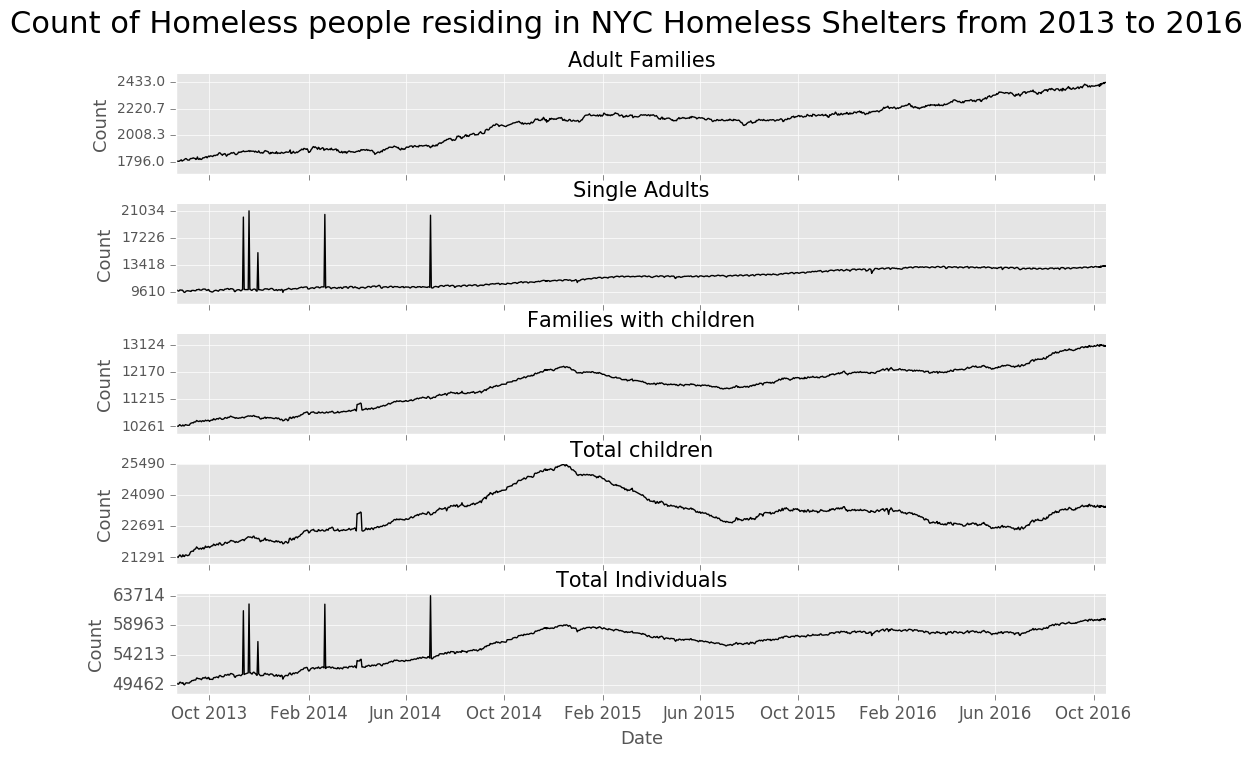

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(12,8))
pl.subplots_adjust(hspace=0.3)
pl.suptitle('Count of Homeless people residing in NYC Homeless Shelters from 2013 to 2016', fontsize = 22)
#                     left=0.125, right=0.9,
#                     top=0.9,    bottom=0.1)
#  = pl.figure(figsize=(12,12))

# pl.subplot(411)
ax1.plot(list(data.date_of_census), list(data.adult_families_in_shelter), 'k')
ax1.set_ylabel('Count', size = 13)
ax1.spines['right'].set_color('none')  
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Adult Families', fontsize = 15)
# ax1.grid(False)
ax1.set_yticks(np.linspace(min(list(data.adult_families_in_shelter)), 
                           max(list(data.adult_families_in_shelter)), 4) )

# pl.subplot(412)
ax2.plot(list(data.date_of_census),list(data.total_single_adults_in_shelter), 'k')
ax2.set_ylabel('Count', size = 13)
ax2.spines['right'].set_color('none')  
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
# ax2.grid(False)
ax2.set_title('Single Adults', fontsize = 15)
ax2.set_yticks(np.linspace(min(list(data.total_single_adults_in_shelter)), 
                           max(list(data.total_single_adults_in_shelter)), 4) )
# pl.subplot(413)
ax3.plot(list(data.date_of_census), list(data.families_with_children_in_shelter), 'k')
ax3.set_ylabel('Count', size = 13)
ax3.spines['right'].set_color('none')  
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
# ax3.grid(False)
ax3.set_title('Families with children', fontsize = 15)
ax3.set_yticks(np.linspace(min(list(data.families_with_children_in_shelter)), 
                           max(list(data.families_with_children_in_shelter)), 4) )
# pl.subplot(414)
ax4.plot(list(data.date_of_census), list(data.total_children_in_shelter), 'k')
ax4.set_ylabel('Count', size = 13)
ax4.spines['right'].set_color('none')  
ax4.spines['top'].set_color('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.yaxis.set_ticks_position('left')
# ax4.grid(False)
ax4.set_title('Total children', fontsize = 15)
ax4.set_yticks(np.linspace(min(list(data.total_children_in_shelter)), 
                           max(list(data.total_children_in_shelter)), 4) )

ax5.plot(list(data.date_of_census), list(data.total_individuals_in_shelter), 'k')
ax5.set_ylabel('Count', size = 13)
ax5.spines['right'].set_color('none')  
ax5.spines['top'].set_color('none')
ax5.xaxis.set_ticks_position('bottom')
ax5.yaxis.set_ticks_position('left')
ax5.set_title('Total Individuals', fontsize = 15)
# ax5.grid(False)
ax5.set_xlabel('Date', size = 13)
ax5.tick_params(labelsize=12)
ax5.set_yticks(np.linspace(min(list(data.total_individuals_in_shelter)), 
                           max(list(data.total_individuals_in_shelter)), 4) )

pl.show()

## Figure 1: Daily number of families and individuals residing in the Department of Homeless Services (DHS) shelter system. The number of homeless people has increased overtime; the spikes present maybe because of incorrect data entries 